In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dados = pd.read_excel('dados_possiveis_assinantes_c_label_2_clusters.xlsx')
dados = dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação', 'Cluster', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?', 'Com qual gênero você se identifica?'])
dados.head()

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Assinaria o plano premium?
0,Menos de 18 anos,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Não
1,Menos de 18 anos,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Sim
2,Menos de 18 anos,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Sim
3,Entre 46 e 59 anos,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Sim
4,Menos de 18 anos,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Sim


In [25]:
df_y, df_x = dados['Assinaria o plano premium?'], dados.drop(columns=['Assinaria o plano premium?'])
display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Menos de 18 anos,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
2,Menos de 18 anos,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
3,Entre 46 e 59 anos,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Menos de 18 anos,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


0    Não
1    Sim
2    Sim
3    Sim
4    Sim
Name: Assinaria o plano premium?, dtype: object

# Modelo

## Tratando dataframe

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df_x:
    df_x[i] = le.fit_transform(df_x[i])

df_y = le.fit_transform(df_y)

display(df_x.head())
display(df_y)

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,5,1,3,4,4,4,0,2,0,3,1,1,3,0
1,5,1,2,0,3,3,1,2,0,1,0,2,6,2
2,5,1,1,2,5,3,0,2,0,3,1,0,6,2
3,4,5,0,3,4,1,1,1,1,2,1,0,6,2
4,5,1,2,0,1,3,1,2,0,3,1,0,6,2


array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0])

In [27]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=SEED)

display(x_train)
display(y_train)
display(x_test)
display(y_test)

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
75,2,5,1,3,5,1,1,2,0,2,1,1,3,0
138,4,5,2,3,5,3,1,0,0,1,1,0,6,2
2,5,1,1,2,5,3,0,2,0,3,1,0,6,2
86,5,0,2,1,5,4,0,2,0,1,0,2,6,2
45,5,0,1,1,2,4,0,0,1,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,6,2,0,5,0,1,1,0,2,1,1,3,1
106,5,0,2,1,5,4,0,3,0,1,1,1,4,1
14,1,2,3,4,2,3,1,3,0,3,0,2,6,2
92,1,1,1,1,4,3,0,2,0,3,0,2,6,2


array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
78,5,1,3,3,4,3,1,2,0,3,0,2,6,2
155,4,5,0,1,0,3,0,0,1,1,1,1,5,1
128,2,5,2,1,4,3,1,2,1,3,1,1,3,1
55,5,1,2,0,4,4,1,2,1,2,1,1,5,0
94,5,0,0,1,5,4,1,1,1,2,1,1,0,0
29,1,5,2,1,3,4,1,2,0,3,1,0,6,2
147,2,5,0,1,5,3,0,2,0,1,1,1,3,1
51,5,1,1,1,5,0,0,2,0,3,1,0,6,2
98,5,0,2,0,5,4,0,0,0,2,1,1,3,1
141,4,5,3,2,0,2,1,0,0,1,1,0,6,2


array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## Naive Bayes

### Modelo

In [28]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicao_gnb = gnb.fit(x_train, y_train).predict(x_test)

probabilidades_naive_bayes = list(gnb.predict_proba(x_test))
# for j, i in enumerate(probabilidades_naive_bayes): probabilidades_naive_bayes[j] = np.round(probabilidades_naive_bayes[j] *100, 2)
for j, i in enumerate(probabilidades_naive_bayes):
    probabilidades_naive_bayes[j] = list(i)
print(probabilidades_naive_bayes)
display(predicao_gnb)

[[0.6531127533950852, 0.34688724660491604], [0.29240175532078766, 0.7075982446792134], [0.21634238462350014, 0.7836576153765007], [0.868338955458977, 0.13166104454102384], [0.38967940815809954, 0.6103205918418997], [0.7705211341219228, 0.22947886587807564], [0.45629311837767234, 0.5437068816223288], [0.0005176351087189892, 0.9994823648912798], [0.9876533605211979, 0.012346639478800906], [0.4929565307439957, 0.5070434692560055], [0.9304837255857726, 0.06951627441422864], [0.000654748121084213, 0.9993452518789153], [0.5990586316324938, 0.40094136836750705], [0.8609740044646496, 0.13902599553535197], [0.9445410598692304, 0.05545894013076819], [0.00010198824578517005, 0.999898011754215], [0.6794386381136088, 0.3205613618863921], [0.7495471080651767, 0.2504528919348222], [0.9024823030632985, 0.09751769693670279], [0.0012198852547870094, 0.9987801147452121], [0.12436773803616867, 0.8756322619638301], [0.8648799128974022, 0.1351200871025977], [0.3969291192204615, 0.6030708807795399], [0.84360

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

### Avaliando modelo

In [29]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_gnb, target_names=list(le.classes_)))

              precision    recall  f1-score   support

         Não       0.58      0.73      0.65        15
         Sim       0.69      0.53      0.60        17

    accuracy                           0.62        32
   macro avg       0.64      0.63      0.62        32
weighted avg       0.64      0.62      0.62        32



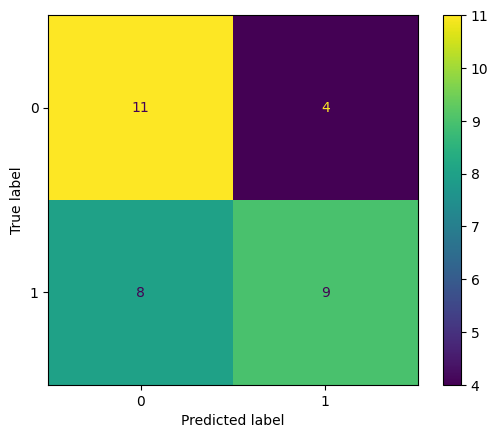

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_gnb)).plot()

## Regressão linear

### Modelo

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

predicao_lr = lr.fit(x_train, y_train).predict(x_test)

probabilidades_linear_regression = list(lr.predict_proba(x_test))

for j, i in enumerate(probabilidades_naive_bayes):
    probabilidades_naive_bayes[j] = list(i)

print(probabilidades_linear_regression)
display(predicao_lr)

[array([0.60245711, 0.39754289]), array([0.25056547, 0.74943453]), array([0.16842377, 0.83157623]), array([0.84430799, 0.15569201]), array([0.50912848, 0.49087152]), array([0.80177063, 0.19822937]), array([0.31081553, 0.68918447]), array([0.01659156, 0.98340844]), array([0.97372318, 0.02627682]), array([0.42727498, 0.57272502]), array([0.8508308, 0.1491692]), array([0.06380731, 0.93619269]), array([0.27979019, 0.72020981]), array([0.88745287, 0.11254713]), array([0.8138015, 0.1861985]), array([0.01119737, 0.98880263]), array([0.75936597, 0.24063403]), array([0.56778716, 0.43221284]), array([0.91955656, 0.08044344]), array([0.08355883, 0.91644117]), array([0.1425987, 0.8574013]), array([0.70930235, 0.29069765]), array([0.47839609, 0.52160391]), array([0.76898093, 0.23101907]), array([0.88147297, 0.11852703]), array([0.16225255, 0.83774745]), array([0.45997363, 0.54002637]), array([0.87752798, 0.12247202]), array([0.351678, 0.648322]), array([0.1259428, 0.8740572]), array([0.33845114, 0.

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

### Avaliando  modelo

In [32]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_lr, target_names=list(le.classes_)))

              precision    recall  f1-score   support

         Não       0.75      0.80      0.77        15
         Sim       0.81      0.76      0.79        17

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32



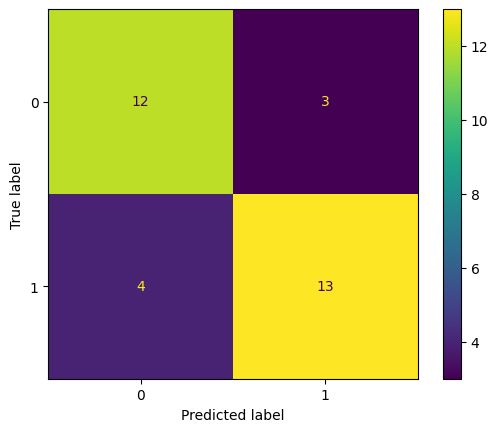

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_lr)).plot()

## Arvore de decisão

### Modelo

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
predicao_dtc = dtc.fit(x_train, y_train).predict(x_test)

display(predicao_dtc)

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

### Avaliando modelo

In [35]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_dtc, target_names=list(le.classes_)))

              precision    recall  f1-score   support

         Não       1.00      0.87      0.93        15
         Sim       0.89      1.00      0.94        17

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32



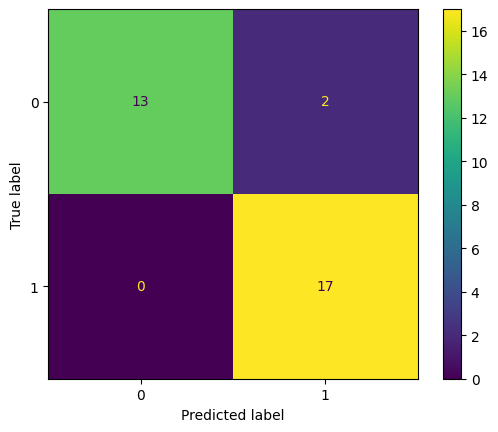

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_dtc)).plot()

### Visualizando modelo

[Text(0.6071428571428571, 0.9, 'Com que frequência você vai aos museus? <= 3.5\ngini = 0.484\nsamples = 127\nvalue = [75, 52]\nclass = 0'),
 Text(0.35714285714285715, 0.7, 'Qual a renda per capita da sua casa?\xa0(A\xa0renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas) <= 2.5\ngini = 0.375\nsamples = 68\nvalue = [17, 51]\nclass = 1'),
 Text(0.4821428571428571, 0.8, 'True  '),
 Text(0.21428571428571427, 0.5, 'Com que frequência você vai aos museus? <= 2.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]\nclass = 1'),
 Text(0.14285714285714285, 0.3, 'Com que frequência você vai aos museus? <= 1.5\ngini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]\nclass = 1'),
 Text(0.07142857142857142, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 1'),
 Text(0.21428571428571427, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]\nclass = 1'),
 Text(0.5, 

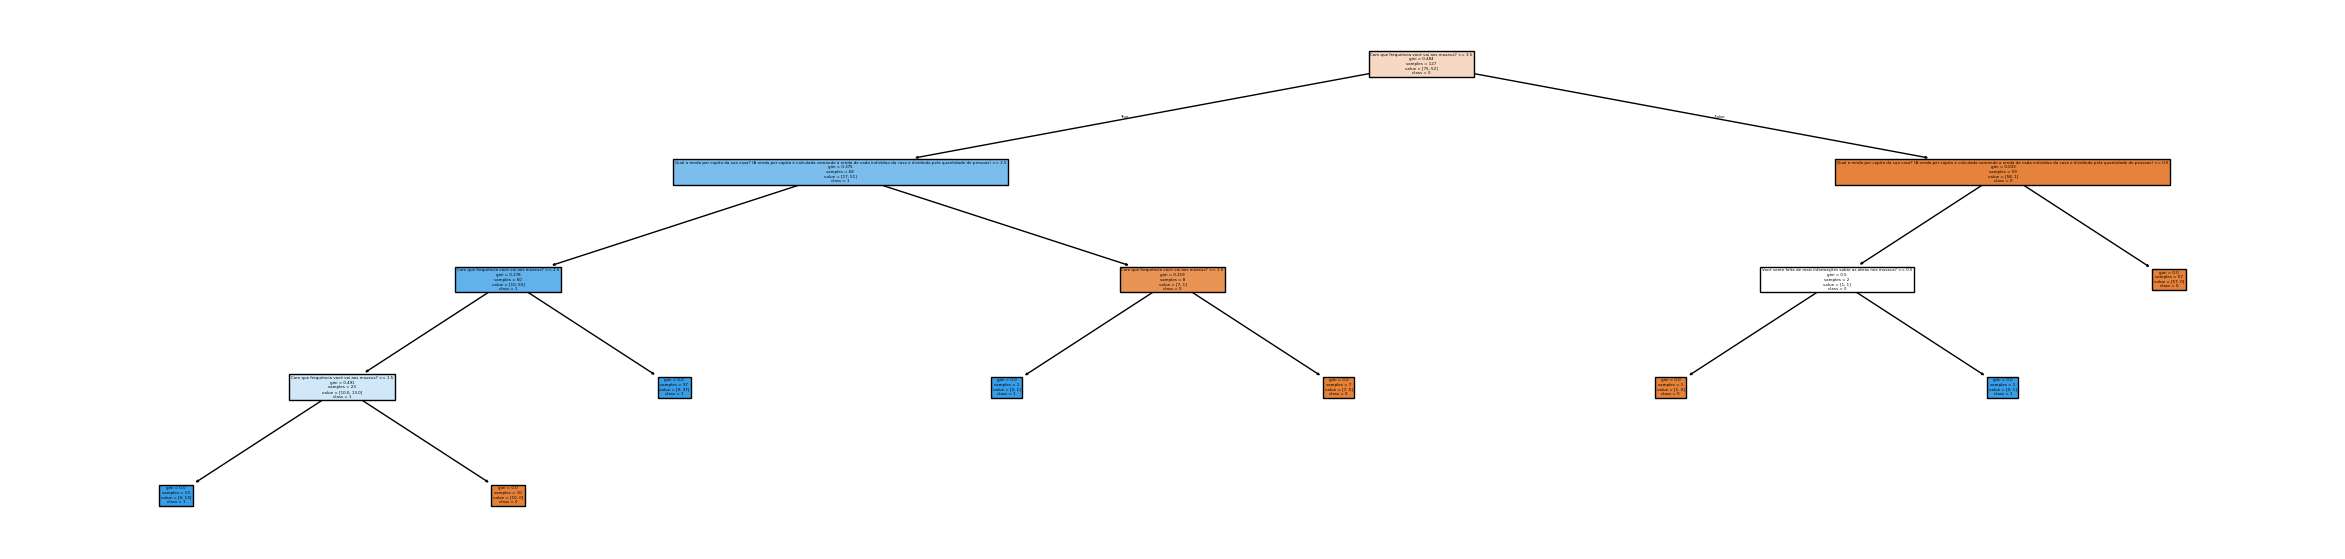

In [37]:
from sklearn import tree

plt.figure(figsize=(30,7))
classes = [str(x) for x in dtc.classes_]

tree.plot_tree(dtc, 
               feature_names=list(df_x.columns), 
               class_names=classes, filled=True)

## KNN

# Modelo: analisando colunas

In [38]:
dados.columns

Index(['Em qual faixa etária você se encaixa?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informações?',
       'Você encontra o que 

In [39]:
for i in dados:
    print(dados[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      79
Entre 25 e 35 anos    26
Entre 46 e 59 anos    19
Entre 18 e 24 anos    13
60+ anos              11
Entre 36 e 45 anos    11
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  59
Cursando ensino médio                      50
Cursando ensino fundamental                31
Ensino superior incompleto/não iniciado     8
Cursando ensino superior                    6
Ensino fundamental incompleto               4
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    69
Classe B: entre R$ 7,1 mil e R$ 22 mil     53
Classes D/E: até R$ 2,9 mil                19
Classe A: superior a R$ 22 mil             18
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?

In [40]:
assinantes = dados.loc[dados['Assinaria o plano premium?'] == 'Sim']
for i in assinantes:
    print(assinantes[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      27
Entre 25 e 35 anos    16
Entre 46 e 59 anos    12
60+ anos               5
Entre 36 e 45 anos     5
Entre 18 e 24 anos     4
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  36
Cursando ensino médio                      20
Cursando ensino fundamental                 8
Ensino superior incompleto/não iniciado     3
Ensino fundamental incompleto               1
Cursando ensino superior                    1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    30
Classe B: entre R$ 7,1 mil e R$ 22 mil     23
Classe A: superior a R$ 22 mil             15
Classes D/E: até R$ 2,9 mil                 1
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Há mais de 10 anos       31
De 5 a 9 anos    

In [41]:
n_assinantes = dados.loc[dados['Assinaria o plano premium?'] == 'Não']
for i in n_assinantes:
    print(n_assinantes[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      52
Entre 25 e 35 anos    10
Entre 18 e 24 anos     9
Entre 46 e 59 anos     7
Entre 36 e 45 anos     6
60+ anos               6
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino médio                      30
Cursando ensino fundamental                23
Ensino superior concluído                  23
Cursando ensino superior                    5
Ensino superior incompleto/não iniciado     5
Ensino fundamental incompleto               3
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    39
Classe B: entre R$ 7,1 mil e R$ 22 mil     30
Classes D/E: até R$ 2,9 mil                18
Classe A: superior a R$ 22 mil              3
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?